# Modelo de Classificação

In [530]:
#Importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Preditoras Numericas
- satisfaction_level (nível de satisfação - varia de 0 a 1)
- last_evaluation (última avaliação - varia de 0 a 1)
- average_montly_hours (média de horas trabalhadas por mês)
- time_spend_company (tempo de empresa em anos)
- num_project (número de projetos realizados)

### Preditoras Categóricas

- Work_accident: Indica se o funcionário sofreu um acidente de trabalho (0 = não, 1 = sim).
- promotion_last_5years: Indica se o funcionário foi promovido nos últimos 5 anos (0 = não, 1 = sim).
- salary: Faixa salarial (categorias: low, medium, high).
- depto: Departamento do funcionário (categorias como sales, technical, etc.).

In [531]:
# Importar os dados
df = pd.read_csv('HR_Abandono.csv',sep=";")
df.head()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,depto
0,1,1,"0,38","0,53",157,3,0,0,low,2,sales
1,2,1,"0,8","0,86",262,6,0,0,medium,5,sales
2,3,1,"0,11","0,88",272,4,0,0,medium,6,sales
3,4,1,"0,72","0,87",223,5,0,0,low,5,sales
4,5,1,"0,37","0,52",159,3,0,0,low,2,sales


In [532]:
# dataset info to find columns and count of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     15000 non-null  int64 
 1   left                   15000 non-null  int64 
 2   satisfaction_level     15000 non-null  object
 3   last_evaluation        15000 non-null  object
 4   average_montly_hours   15000 non-null  int64 
 5   time_spend_company     15000 non-null  int64 
 6   Work_accident          15000 non-null  int64 
 7   promotion_last_5years  15000 non-null  int64 
 8   salary                 15000 non-null  object
 9   num_project            15000 non-null  int64 
 10  depto                  15000 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


Tratamento dos dados

In [533]:
# excluindo variáveis que não são necessárias
df = df.drop(['id'], axis = 1)
df.head() 

,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,0,low,2,sales
1,1,"0,8","0,86",262,6,0,0,medium,5,sales
2,1,"0,11","0,88",272,4,0,0,medium,6,sales
3,1,"0,72","0,87",223,5,0,0,low,5,sales
4,1,"0,37","0,52",159,3,0,0,low,2,sales


In [534]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(df.isnull().sum(), df.isnull().sum()/len(df)), columns=['Count', 'Proportion'], index=df.columns)

,Count,Proportion
left,0,0.0
satisfaction_level,0,0.0
last_evaluation,0,0.0
average_montly_hours,0,0.0
time_spend_company,0,0.0
Work_accident,0,0.0
promotion_last_5years,0,0.0
salary,0,0.0
num_project,0,0.0
depto,0,0.0


In [535]:
# Substituir vírgulas por pontose converter para float
df['satisfaction_level'] = df['satisfaction_level'].str.replace(',', '.').astype(float)

df['last_evaluation'] = df['last_evaluation'].str.replace(',', '.').astype(float)
# Verificar o tipo da coluna após a conversão
print(df.dtypes)

left                       int64
satisfaction_level       float64
last_evaluation          float64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                    object
num_project                int64
depto                     object
dtype: object


## Analises Descritivas

In [536]:
# algumas analises descritivas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
left,15000.0,0.238533,0.426201,0.00,0.00,0.00,0.00,1.0
satisfaction_level,15000.0,0.616725,0.243012,0.10,0.44,0.64,0.82,1.0
last_evaluation,15000.0,0.716089,0.171170,0.36,0.56,0.72,0.87,1.0
average_montly_hours,15000.0,201.187400,50.887422,96.00,156.00,200.00,245.00,808.0
time_spend_company,15000.0,3.407067,1.176091,2.00,3.00,3.00,4.00,6.0
Work_accident,15000.0,0.144600,0.351709,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,15000.0,0.021800,0.146035,0.00,0.00,0.00,0.00,1.0
num_project,15000.0,3.785867,1.194589,2.00,3.00,4.00,5.00,6.0


### analise das variavies numericas

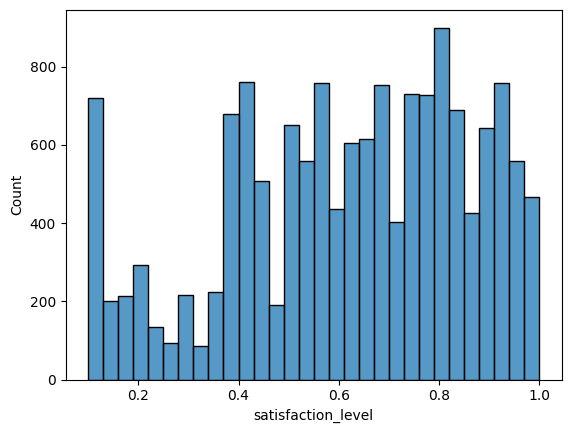

In [537]:
# Variável preditora: satisfaction_level 

sb.histplot(data=df, x="satisfaction_level");

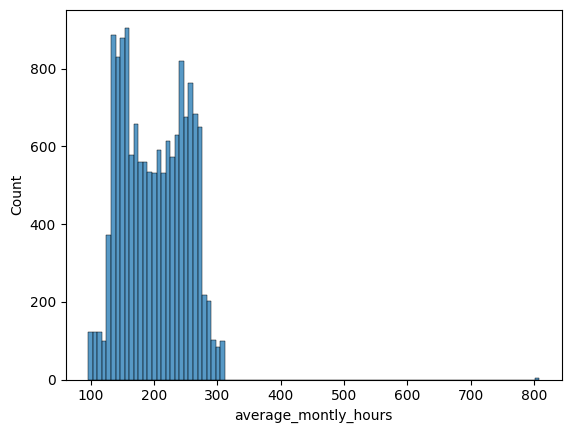

In [538]:
# Variável preditora: satisfaction_level 

sb.histplot(data=df, x="average_montly_hours");

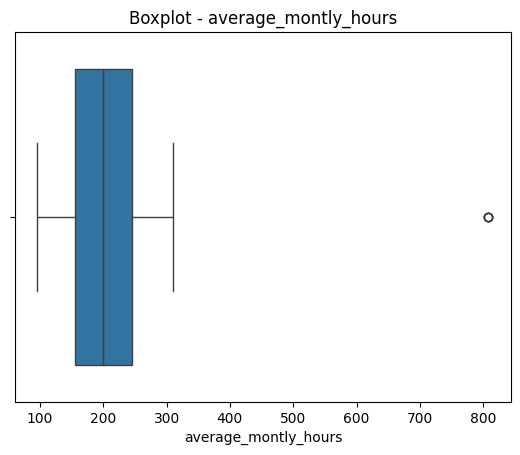

In [539]:
sb.boxplot(data=df, x="average_montly_hours", orient="h")
plt.title("Boxplot - average_montly_hours")
plt.show()

In [540]:
Q1 = df['average_montly_hours'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = df['average_montly_hours'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1  # Intervalo interquartil

# Limites para detecção de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['average_montly_hours'] < lower_bound) | (df['average_montly_hours'] > upper_bound)]

print(f"Limite inferior: {lower_bound}")
print(f"Limite superior: {upper_bound}")
print(f"Número de outliers: {len(outliers)}")


Limite inferior: 22.5
Limite superior: 378.5
Número de outliers: 4


In [541]:
df_cleaned = df[(df['average_montly_hours'] >= lower_bound) & (df['average_montly_hours'] <= upper_bound)]

print(f"Dimensão original: {df.shape}")
print(f"Dimensão após remover outliers: {df_cleaned.shape}")


Dimensão original: (15000, 10)
Dimensão após remover outliers: (14996, 10)


In [542]:
# Sobrescrevendo o DataFrame com valores dentro dos limites
df = df[(df['average_montly_hours'] >= lower_bound) & (df['average_montly_hours'] <= upper_bound)]


In [543]:
promovidos = df['promotion_last_5years'].sum()

print(f'Total de funcionários promovidos: {promovidos}')

Total de funcionários promovidos: 327


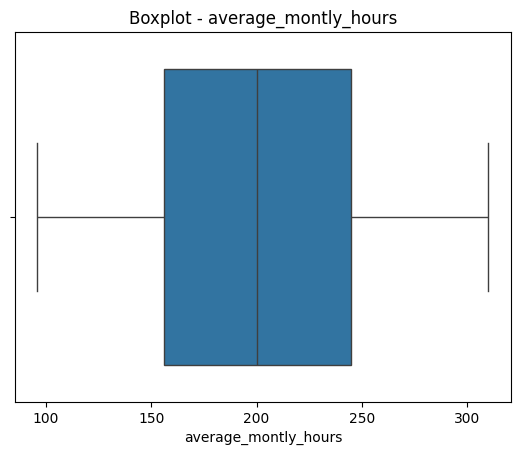

In [544]:
sb.boxplot(data=df, x="average_montly_hours", orient="h")
plt.title("Boxplot - average_montly_hours")
plt.show()

<Axes: xlabel='left', ylabel='satisfaction_level'>

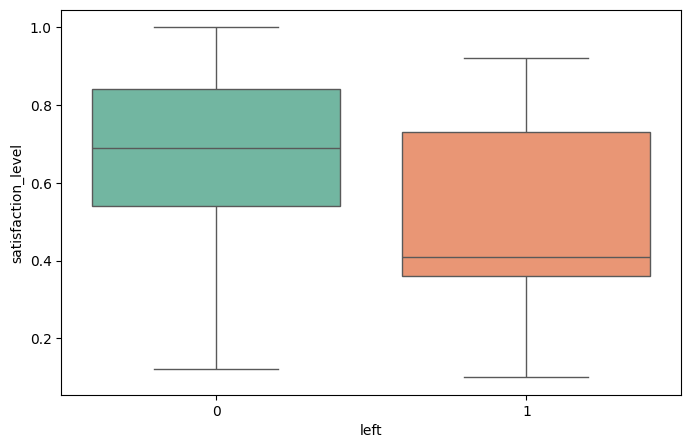

In [545]:
plt.figure(figsize=(8, 5))
sb.boxplot(x='left', y='satisfaction_level', data=df, palette='Set2')

Text(0.5, 1.0, 'Relação entre Nível de Satisfação e Última Avaliação')

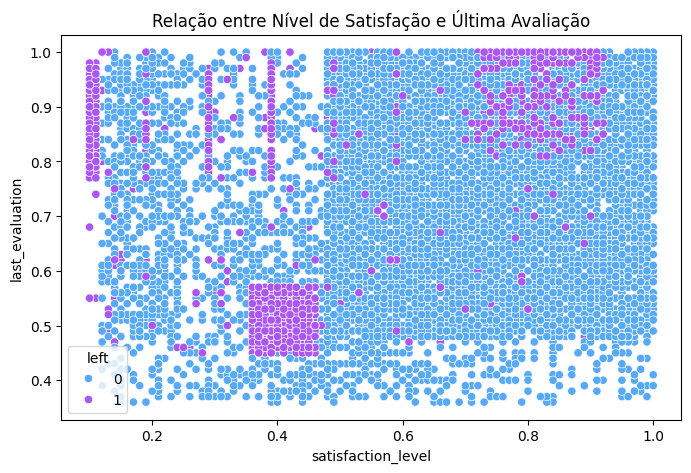

In [546]:
plt.figure(figsize=(8, 5))
sb.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=df, palette='cool')
plt.title('Relação entre Nível de Satisfação e Última Avaliação')

### Analise das variaveis categoricas

<Axes: xlabel='salary', ylabel='count'>

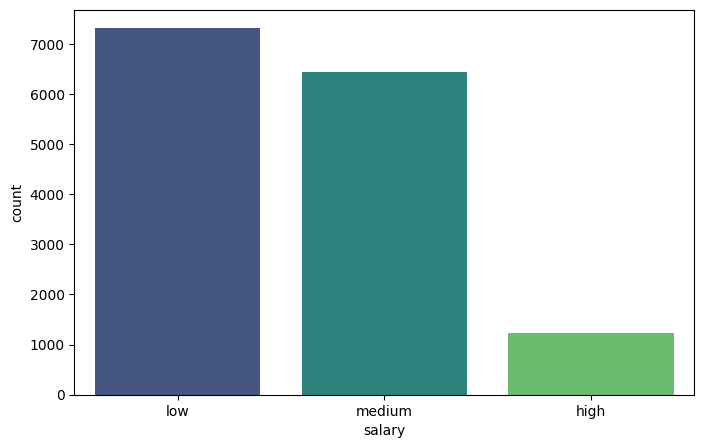

In [547]:
plt.figure(figsize=(8, 5))
sb.countplot(x='salary', data=df, palette='viridis')

<Axes: xlabel='salary'>

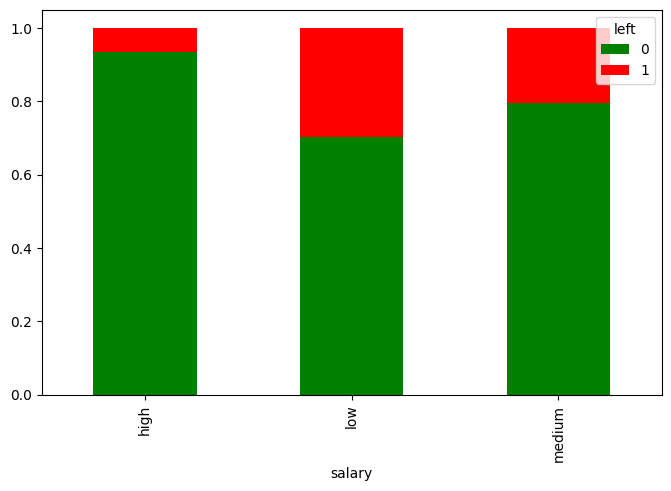

In [548]:
# Calculando proporções de saída por categoria
salary_left = pd.crosstab(df['salary'], df['left'], normalize='index')

salary_left.plot(kind='bar', stacked=True, figsize=(8, 5), color=['green', 'red'])

<Axes: xlabel='salary', ylabel='depto'>

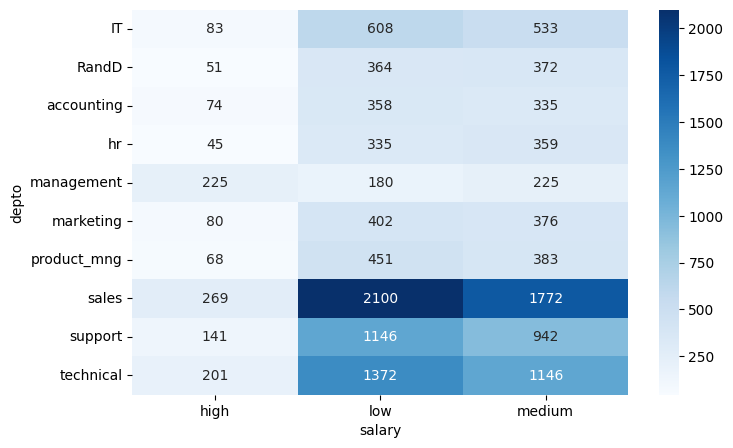

In [549]:
plt.figure(figsize=(8, 5))
heatmap_data = pd.crosstab(df['depto'], df['salary'])
sb.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')

Transformando variaveis caregoricas

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14996 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14996 non-null  int64  
 1   satisfaction_level     14996 non-null  float64
 2   last_evaluation        14996 non-null  float64
 3   average_montly_hours   14996 non-null  int64  
 4   time_spend_company     14996 non-null  int64  
 5   Work_accident          14996 non-null  int64  
 6   promotion_last_5years  14996 non-null  int64  
 7   salary                 14996 non-null  object 
 8   num_project            14996 non-null  int64  
 9   depto                  14996 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [551]:
df.head()

,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,depto
0,1,0.38,0.53,157,3,0,0,low,2,sales
1,1,0.80,0.86,262,6,0,0,medium,5,sales
2,1,0.11,0.88,272,4,0,0,medium,6,sales
3,1,0.72,0.87,223,5,0,0,low,5,sales
4,1,0.37,0.52,159,3,0,0,low,2,sales


In [552]:
baseline_df = pd.get_dummies(df, drop_first=True)

In [553]:
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14996 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14996 non-null  int64  
 1   satisfaction_level     14996 non-null  float64
 2   last_evaluation        14996 non-null  float64
 3   average_montly_hours   14996 non-null  int64  
 4   time_spend_company     14996 non-null  int64  
 5   Work_accident          14996 non-null  int64  
 6   promotion_last_5years  14996 non-null  int64  
 7   num_project            14996 non-null  int64  
 8   salary_low             14996 non-null  bool   
 9   salary_medium          14996 non-null  bool   
 10  depto_RandD            14996 non-null  bool   
 11  depto_accounting       14996 non-null  bool   
 12  depto_hr               14996 non-null  bool   
 13  depto_management       14996 non-null  bool   
 14  depto_marketing        14996 non-null  bool   
 15  depto_p

In [554]:
baseline_df.head() 

,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project,salary_low,salary_medium,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical
0,1,0.38,0.53,157,3,0,0,2,True,False,False,False,False,False,False,False,True,False,False
1,1,0.80,0.86,262,6,0,0,5,False,True,False,False,False,False,False,False,True,False,False
2,1,0.11,0.88,272,4,0,0,6,False,True,False,False,False,False,False,False,True,False,False
3,1,0.72,0.87,223,5,0,0,5,True,False,False,False,False,False,False,False,True,False,False
4,1,0.37,0.52,159,3,0,0,2,True,False,False,False,False,False,False,False,True,False,False


Entendendo Proporcionalidade da base

In [555]:
# Variável target: "Left" : Quantos Sairam da base
(df.left.value_counts() / df.shape[0]) * 100

left
0    76.166978
1    23.833022
Name: count, dtype: float64

### Iniciando o desenvolvimento do Modelo

Selecionando Variaveis Preditoras

In [556]:

X = baseline_df[baseline_df.columns.difference(['left'])].values
print(X)

[[0 157 False ... False 0.38 3]
 [0 262 False ... True 0.8 6]
 [0 272 False ... True 0.11 4]
 ...
 [0 280 False ... False 0.11 4]
 [0 158 False ... False 0.37 3]
 [0 257 False ... False 0.38 4]]


Variavel Target

In [557]:
y = baseline_df['left'].values
print(y)

[1 1 1 ... 1 1 1]


Utilizamos 70/30 Teste e treino

In [558]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste:
X_treino, X_teste, y_treino, y_teste = train_test_split(baseline_df.drop('left',axis=1),baseline_df['left'],test_size=0.3, random_state=17)

In [559]:
X_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10497.0,0.617584,0.243131,0.10,0.44,0.65,0.82,1.0
last_evaluation,10497.0,0.715505,0.171711,0.36,0.56,0.72,0.87,1.0
average_montly_hours,10497.0,200.940364,49.693438,96.00,156.00,200.00,245.00,310.0
time_spend_company,10497.0,3.413737,1.181029,2.00,3.00,3.00,4.00,6.0
Work_accident,10497.0,0.141660,0.348717,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,10497.0,0.023149,0.150385,0.00,0.00,0.00,0.00,1.0
num_project,10497.0,3.777651,1.191986,2.00,3.00,4.00,5.00,6.0


In [560]:
X_treino.shape, y_treino.shape

((10497, 18), (10497,))

Normalizando a base para que todas as variaveis fique na escala entre 0 e 1

In [561]:
from sklearn.preprocessing import MinMaxScaler

cols = X_treino.columns

MinMax = MinMaxScaler()

X_treino = MinMax.fit_transform(X_treino)
X_teste = MinMax.transform(X_teste)

X_treino = pd.DataFrame(X_treino, columns=[cols])

In [562]:
X_treino.columns

MultiIndex([(   'satisfaction_level',),
            (      'last_evaluation',),
            ( 'average_montly_hours',),
            (   'time_spend_company',),
            (        'Work_accident',),
            ('promotion_last_5years',),
            (          'num_project',),
            (           'salary_low',),
            (        'salary_medium',),
            (          'depto_RandD',),
            (     'depto_accounting',),
            (             'depto_hr',),
            (     'depto_management',),
            (      'depto_marketing',),
            (    'depto_product_mng',),
            (          'depto_sales',),
            (        'depto_support',),
            (      'depto_technical',)],
           )

In [563]:
X_treino.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project,salary_low,salary_medium,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical
0,0.922222,0.328125,0.509346,0.50,1.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.633333,0.703125,0.584112,0.50,1.0,0.0,0.25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.900000,0.500000,0.570093,0.25,1.0,0.0,0.25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.322222,0.234375,0.154206,0.25,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.655556,0.843750,0.242991,0.00,0.0,0.0,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [564]:
X_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10497.0,0.575093,0.270145,0.0,0.377778,0.611111,0.800000,1.0
last_evaluation,10497.0,0.555477,0.268298,0.0,0.312500,0.562500,0.796875,1.0
average_montly_hours,10497.0,0.490376,0.232212,0.0,0.280374,0.485981,0.696262,1.0
time_spend_company,10497.0,0.353434,0.295257,0.0,0.250000,0.250000,0.500000,1.0
Work_accident,10497.0,0.141660,0.348717,0.0,0.000000,0.000000,0.000000,1.0
promotion_last_5years,10497.0,0.023149,0.150385,0.0,0.000000,0.000000,0.000000,1.0
num_project,10497.0,0.444413,0.297996,0.0,0.250000,0.500000,0.750000,1.0
salary_low,10497.0,0.488330,0.499888,0.0,0.000000,0.000000,1.000000,1.0
salary_medium,10497.0,0.427932,0.494802,0.0,0.000000,0.000000,1.000000,1.0
depto_RandD,10497.0,0.053444,0.224928,0.0,0.000000,0.000000,0.000000,1.0


In [565]:
y_treino

9075     0
4047     0
3614     0
14730    1
9100     0
        ..
9532     0
408      1
13706    0
2194     0
10866    0
Name: left, Length: 10497, dtype: int64

Modelo de Classificação Arvore

In [566]:
Classif_tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
             max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=30, min_samples_split=10,
            min_weight_fraction_leaf=0.0, random_state=18, splitter='best')

In [567]:
Classif_tree

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=10, random_state=18)

In [568]:
Classif_tree.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=10, random_state=18)

In [569]:
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14996 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14996 non-null  int64  
 1   satisfaction_level     14996 non-null  float64
 2   last_evaluation        14996 non-null  float64
 3   average_montly_hours   14996 non-null  int64  
 4   time_spend_company     14996 non-null  int64  
 5   Work_accident          14996 non-null  int64  
 6   promotion_last_5years  14996 non-null  int64  
 7   num_project            14996 non-null  int64  
 8   salary_low             14996 non-null  bool   
 9   salary_medium          14996 non-null  bool   
 10  depto_RandD            14996 non-null  bool   
 11  depto_accounting       14996 non-null  bool   
 12  depto_hr               14996 non-null  bool   
 13  depto_management       14996 non-null  bool   
 14  depto_marketing        14996 non-null  bool   
 15  depto_p

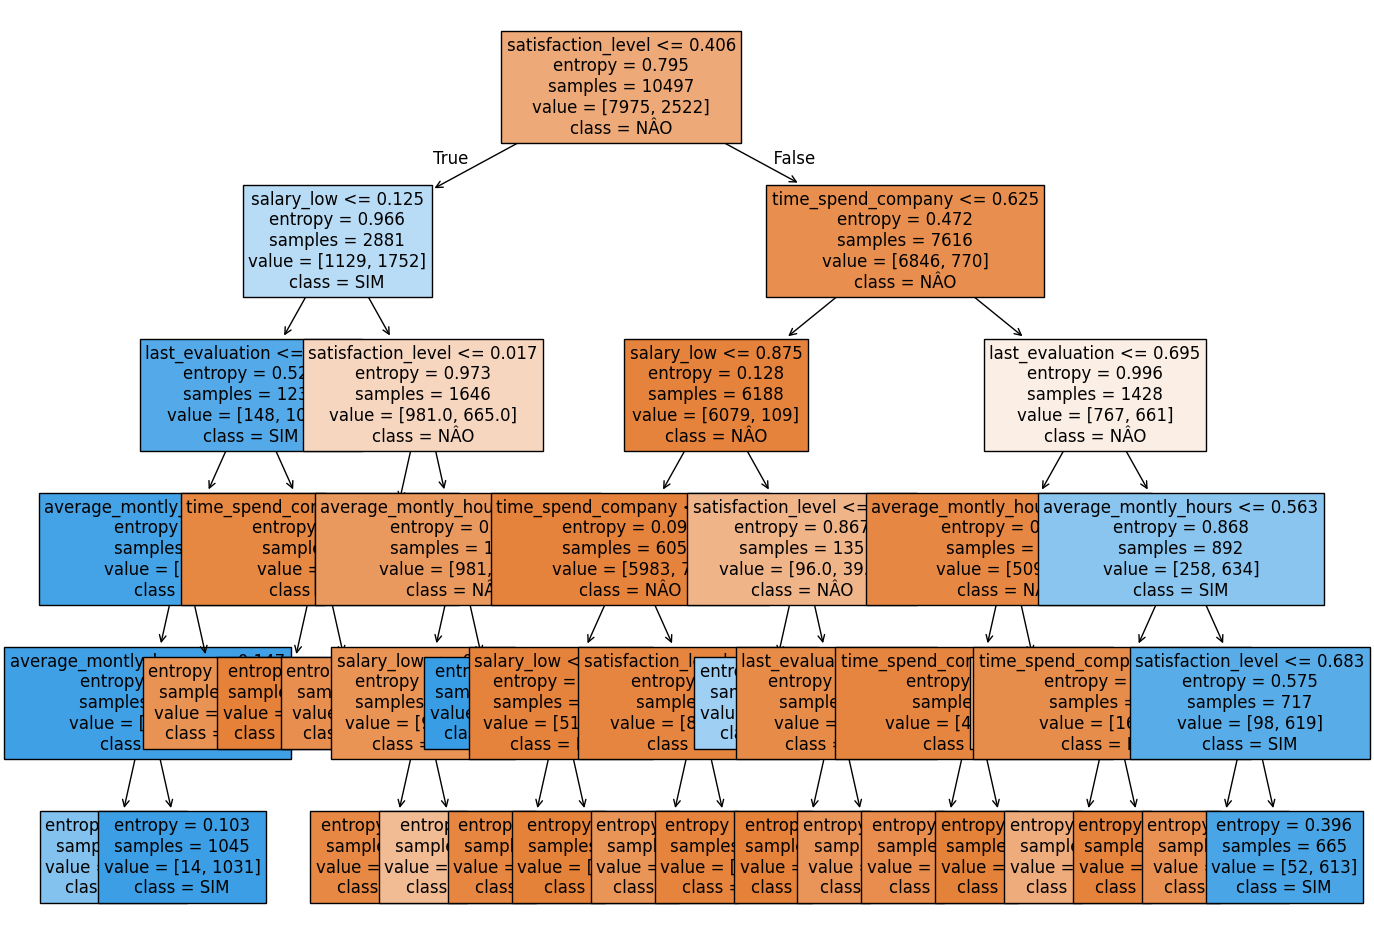

In [570]:
# testando nova saída da árvore com alguns parâmetros de visualização

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,12))
input_features = [
    'satisfaction_level', 
    'last_evaluation', 
    'average_montly_hours', 
    'time_spend_company', 
    'Work_accident', 
    'promotion_last_5years', 
    'salary_low', 
    'salary_medium', 
    'salary_high', 
    'depto_sales', 
    'depto_technical', 
    'depto_support'
]
a = plot_tree(Classif_tree, fontsize=12,filled=True,feature_names=input_features, 
class_names=['NÂO', 'SIM'])  

In [571]:
# Verificando as features mais importantes para o modelo treinado:

for feature,importancia in zip(X_treino.columns,Classif_tree.feature_importances_*100):
    print("{}:{}".format(feature, importancia))  
    

('satisfaction_level',):45.68830717413079
('last_evaluation',):11.863943156340563
('average_montly_hours',):9.188346838865993
('time_spend_company',):21.94897057411099
('Work_accident',):0.0
('promotion_last_5years',):0.0
('num_project',):11.310432256551668
('salary_low',):0.0
('salary_medium',):0.0
('depto_RandD',):0.0
('depto_accounting',):0.0
('depto_hr',):0.0
('depto_management',):0.0
('depto_marketing',):0.0
('depto_product_mng',):0.0
('depto_sales',):0.0
('depto_support',):0.0
('depto_technical',):0.0


In [572]:
# criando um dicionário com as variáveis mais importantes para o modelo treinado
dic = {'score':Classif_tree.feature_importances_*100,'features':cols}
#criando um dataframe com os dados
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df

,score,features
0,45.688307,satisfaction_level
3,21.948971,time_spend_company
1,11.863943,last_evaluation
6,11.310432,num_project
2,9.188347,average_montly_hours
4,0.000000,Work_accident
5,0.000000,promotion_last_5years
7,0.000000,salary_low
8,0.000000,salary_medium
9,0.000000,depto_RandD


In [573]:
# Testando o modelo
y_pred_tree = Classif_tree.predict(X_teste)

In [574]:
y_pred_tree

array([0, 0, 0, ..., 0, 0, 1])

### Avaliação de Desempenho dos Algoritmos

### Matriz de Confusão

![alt text](image.png)

In [575]:
from sklearn.metrics import confusion_matrix

confusion_matrix_tree = confusion_matrix(y_true=y_teste, y_pred=y_pred_tree, labels=Classif_tree.classes_) 
confusion_matrix_tree

array([[3402,   45],
       [ 137,  915]])

### Valores da matriz de confusão
- TP Verdadeiros Positivos
- FN Falsos Negativos
- FP Falsos Positivos
- TN Verdadeiros Negativos

### Calculando as métricas
- accuracy = (TP + TN) / (TP + TN + FP + FN)
- sensitivity = TP / (TP + FN)
- specificity = TN / (TN + FP)

In [576]:
# Extraindo valores da matriz de confusão
TP = confusion_matrix_tree[1, 1]  # Verdadeiros Positivos
FN = confusion_matrix_tree[1, 0]  # Falsos Negativos
FP = confusion_matrix_tree[0, 1]  # Falsos Positivos
TN = confusion_matrix_tree[0, 0]  # Verdadeiros Negativos

# Calculando as métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)  # Também chamado de Recall ou TPR
specificity = TN / (TN + FP)  # Taxa de Verdadeiros Negativos (TNR)

# Exibindo os resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Sensibilidade (Recall): {sensitivity:.2f}")
print(f"Especificidade: {specificity:.2f}")

Acurácia: 0.96
Sensibilidade (Recall): 0.87
Especificidade: 0.99


## Modelo Regresão logistica

In [577]:
logreg = LogisticRegression(penalty='l2',random_state=18)

In [578]:
logreg

LogisticRegression(random_state=18)

In [579]:
logistica = logreg.fit(X_treino, y_treino)  #fitting the model 

In [580]:
print(logistica.coef_) 

[[-3.4895251   0.39298667  0.87595269  2.08604097 -1.68531919 -1.71121631
  -1.49737228  1.84106494  1.30392741 -0.4076099   0.15523481  0.32155677
  -0.26541451  0.08763282  0.07202867  0.14678695  0.2983972   0.31624551]]


In [581]:
cols

Index(['satisfaction_level', 'last_evaluation', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'num_project', 'salary_low', 'salary_medium', 'depto_RandD',
       'depto_accounting', 'depto_hr', 'depto_management', 'depto_marketing',
       'depto_product_mng', 'depto_sales', 'depto_support', 'depto_technical'],
      dtype='object')

In [582]:

coefficients = pd.concat([pd.DataFrame(cols),pd.DataFrame(np.transpose(logistica.coef_))], axis = 1)
coefficients

,0,0
0,satisfaction_level,-3.489525
1,last_evaluation,0.392987
2,average_montly_hours,0.875953
3,time_spend_company,2.086041
4,Work_accident,-1.685319
5,promotion_last_5years,-1.711216
6,num_project,-1.497372
7,salary_low,1.841065
8,salary_medium,1.303927
9,depto_RandD,-0.407610


In [583]:
y_pred_log = logistica.predict(X_teste)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [584]:
logistica.score(X_teste, y_teste)

0.7863969771060235

In [585]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_log = confusion_matrix(y_teste, y_pred_log)
confusion_matrix_log

array([[3168,  279],
       [ 682,  370]])

In [586]:
print(classification_report(y_teste, logistica.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3447
           1       0.57      0.35      0.44      1052

    accuracy                           0.79      4499
   macro avg       0.70      0.64      0.65      4499
weighted avg       0.76      0.79      0.77      4499



In [587]:
# Extraindo valores da matriz de confusão
TP = confusion_matrix_log[1, 1]  # Verdadeiros Positivos
FN = confusion_matrix_log[1, 0]  # Falsos Negativos
FP = confusion_matrix_log[0, 1]  # Falsos Positivos
TN = confusion_matrix_log[0, 0]  # Verdadeiros Negativos

# Calculando as métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)  # Também chamado de Recall ou TPR
specificity = TN / (TN + FP)  # Taxa de Verdadeiros Negativos (TNR)

# Exibindo os resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Sensibilidade (Recall): {sensitivity:.2f}")
print(f"Especificidade: {specificity:.2f}")

Acurácia: 0.79
Sensibilidade (Recall): 0.35
Especificidade: 0.92


## KNN K-Nearest Neighbors

In [588]:
from sklearn.neighbors import KNeighborsClassifier


KNN_classificador = KNeighborsClassifier(n_neighbors = 5)

KNN_classificador.fit(X_treino, y_treino)

KNeighborsClassifier()

In [589]:
X_teste

array([[0.55555556, 0.84375   , 0.20093458, ..., 1.        , 0.        ,
        0.        ],
       [0.92222222, 0.359375  , 0.8271028 , ..., 1.        , 0.        ,
        0.        ],
       [0.92222222, 0.9375    , 0.59345794, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.77777778, 0.703125  , 0.28037383, ..., 1.        , 0.        ,
        0.        ],
       [0.44444444, 0.265625  , 0.21495327, ..., 0.        , 0.        ,
        0.        ],
       [0.37777778, 0.25      , 0.19158879, ..., 0.        , 0.        ,
        0.        ]])

In [590]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_KNN = confusion_matrix(y_teste, KNN_classificador.predict(X_teste))
confusion_matrix_KNN

array([[3330,  117],
       [ 139,  913]])

In [591]:
print(classification_report(y_teste, KNN_classificador.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3447
           1       0.89      0.87      0.88      1052

    accuracy                           0.94      4499
   macro avg       0.92      0.92      0.92      4499
weighted avg       0.94      0.94      0.94      4499



In [592]:
# Extraindo valores da matriz de confusão
TP = confusion_matrix_KNN[1, 1]  # Verdadeiros Positivos
FN = confusion_matrix_KNN[1, 0]  # Falsos Negativos
FP = confusion_matrix_KNN[0, 1]  # Falsos Positivos
TN = confusion_matrix_KNN[0, 0]  # Verdadeiros Negativos

# Calculando as métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)  # Também chamado de Recall ou TPR
specificity = TN / (TN + FP)  # Taxa de Verdadeiros Negativos (TNR)

# Exibindo os resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Sensibilidade (Recall): {sensitivity:.2f}")
print(f"Especificidade: {specificity:.2f}")

Acurácia: 0.94
Sensibilidade (Recall): 0.87
Especificidade: 0.97


# Modelos de Segmentação

In [593]:
# Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from collections import Counter


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [594]:
df = pd.read_csv('HR_Abandono.csv',sep=";")
df.head()

,id,left,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,depto
0,1,1,"0,38","0,53",157,3,0,0,low,2,sales
1,2,1,"0,8","0,86",262,6,0,0,medium,5,sales
2,3,1,"0,11","0,88",272,4,0,0,medium,6,sales
3,4,1,"0,72","0,87",223,5,0,0,low,5,sales
4,5,1,"0,37","0,52",159,3,0,0,low,2,sales


In [595]:
# Cria uma cópia completa do DataFrame para usar no final da analise 
df_backup = df.copy()

#### Clusters Analysis usando o algoritmo k-means  

#### Objetivo: 
        Separar um conjunto de objetos/clientes em grupos (clusters) de forma que os membros de qualquer grupo formado 
        sejam os mais homogêneos possíveis com relação a algum critério, como por exemplo a distância euclidiana.



#### Procedimento:

#### (1) Selecionar  somente variáveis quantitativas (p).
#### (2) Análise exploratória dos dados. 
#### (3) Avaliar a presença de outliers e pontos extremos. 
#### (4) Padronizar as variáveis antes de se calcular as distâncias, assim, as "p" variáveis serão igualmente importantes. 
         Geralmente, a padronização feita é para que todas as variáveis (quantitativas) tenham média zero e variância 1.



Separando Apenas variaveis Quantitativas.

In [596]:
df = df.drop(['id', 'left'], axis=1)
df.head()


,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,num_project,depto
0,"0,38","0,53",157,3,0,0,low,2,sales
1,"0,8","0,86",262,6,0,0,medium,5,sales
2,"0,11","0,88",272,4,0,0,medium,6,sales
3,"0,72","0,87",223,5,0,0,low,5,sales
4,"0,37","0,52",159,3,0,0,low,2,sales


In [597]:
df['satisfaction_level'] = df['satisfaction_level'].str.replace(',', '.').astype(float)

df['last_evaluation'] = df['last_evaluation'].str.replace(',', '.').astype(float)
# Verificar o tipo da coluna após a conversão
print(df.dtypes)

satisfaction_level       float64
last_evaluation          float64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                    object
num_project                int64
depto                     object
dtype: object


In [598]:
# Filtrar apenas as colunas numéricas
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print("Variáveis quantitativas:", numerical_features)


Variáveis quantitativas: Index(['satisfaction_level', 'last_evaluation', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'num_project'],
      dtype='object')


In [599]:
df = df[numerical_features].copy()

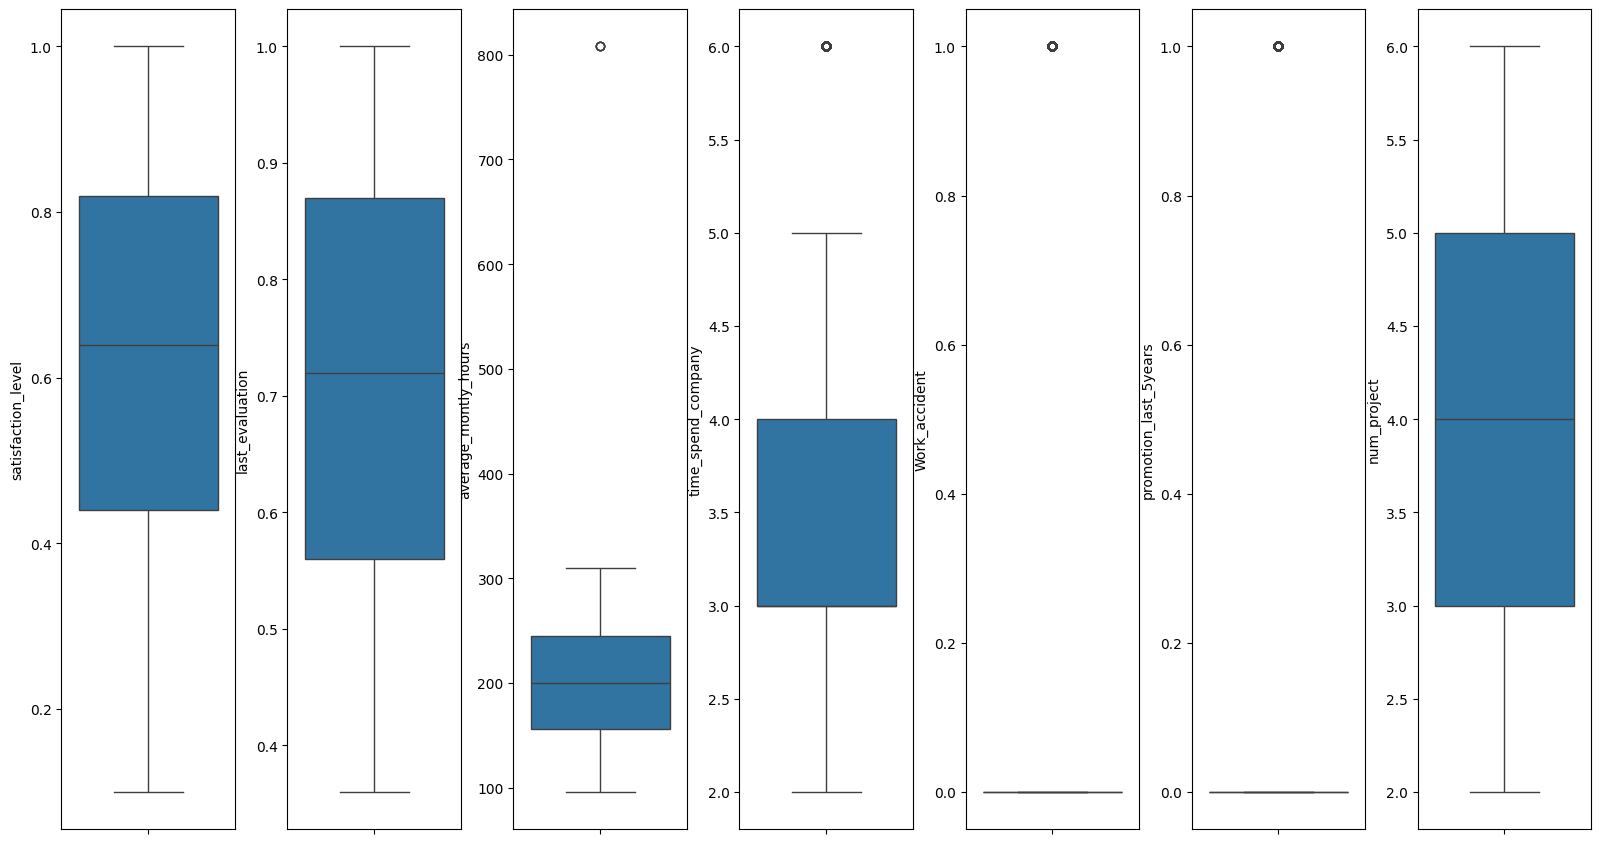

In [600]:
# Análise exploratória dos dados usando o gráfico Box Plot
features = numerical_features
fig,axs=plt.subplots(nrows=1, ncols=7, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.boxplot(x, ax=ax, orient='V')
    plt.subplots_adjust(top=0.90,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.3)

In [601]:
Q1 = df['average_montly_hours'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = df['average_montly_hours'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1  # Intervalo interquartil

# Limites para detecção de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['average_montly_hours'] < lower_bound) | (df['average_montly_hours'] > upper_bound)]

print(f"Limite inferior: {lower_bound}")
print(f"Limite superior: {upper_bound}")
print(f"Número de outliers: {len(outliers)}")

Limite inferior: 22.5
Limite superior: 378.5
Número de outliers: 4


In [602]:
df_cleaned = df[(df['average_montly_hours'] >= lower_bound) & (df['average_montly_hours'] <= upper_bound)]

print(f"Dimensão original: {df.shape}")
print(f"Dimensão após remover outliers: {df_cleaned.shape}")

Dimensão original: (15000, 7)
Dimensão após remover outliers: (14996, 7)


In [603]:
# Sobrescrevendo o DataFrame com valores dentro dos limites
df = df[(df['average_montly_hours'] >= lower_bound) & (df['average_montly_hours'] <= upper_bound)]

## Analise Exploratoria

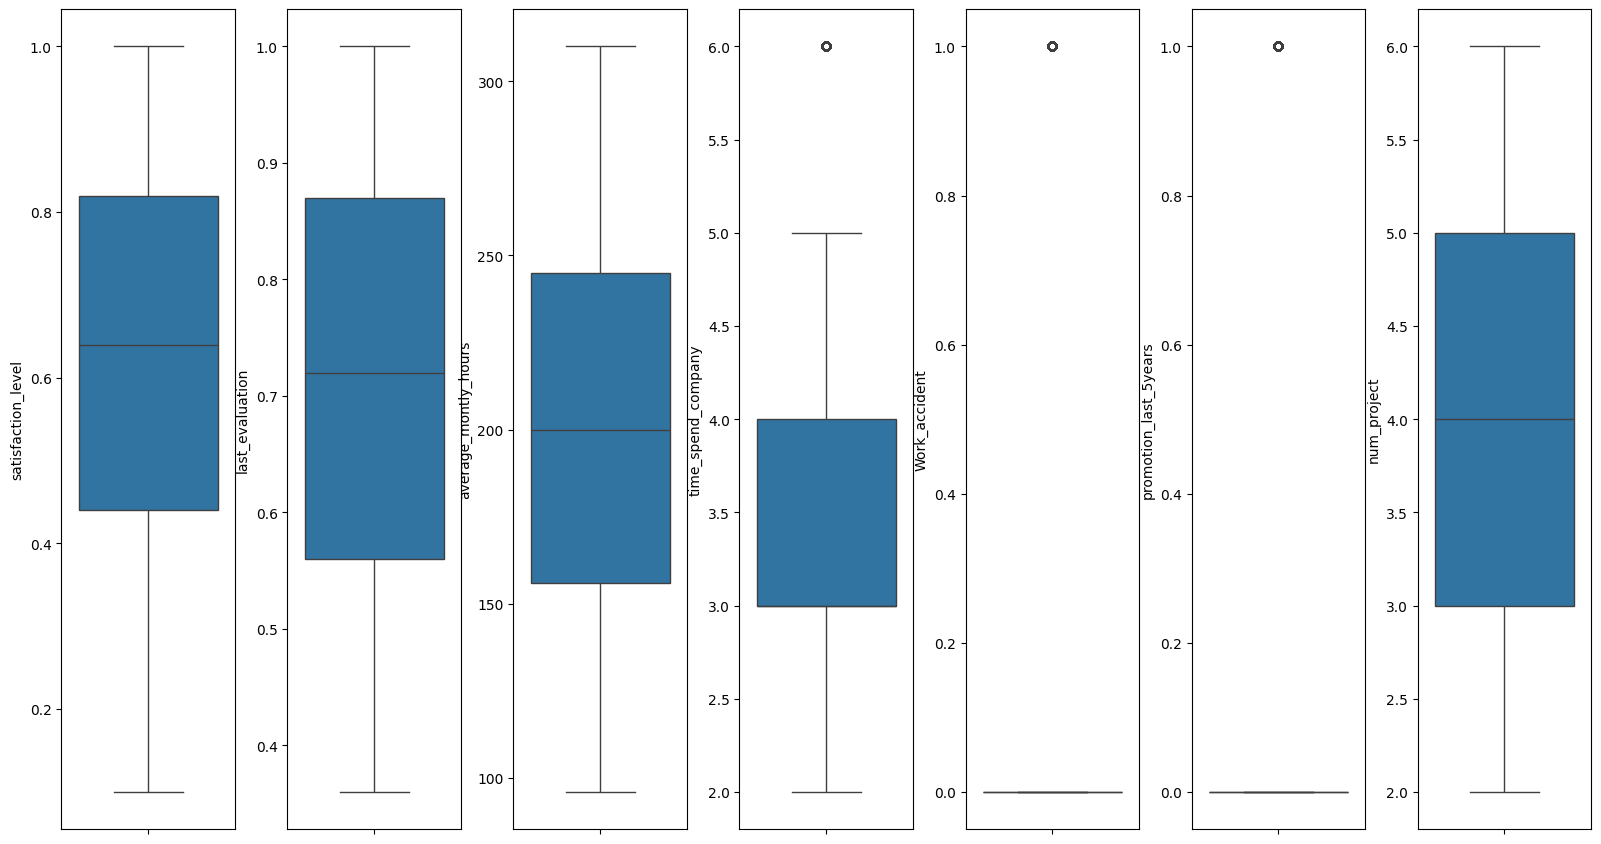

In [604]:
# Análise exploratória dos dados usando o gráfico Box Plot
features = numerical_features
fig,axs=plt.subplots(nrows=1, ncols=7, figsize=(18,10))
for col, ax in zip(features[0:], axs.ravel()):
    x=df.loc[:, col]
    sns.boxplot(x, ax=ax, orient='V')
    plt.subplots_adjust(top=0.90,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.3)

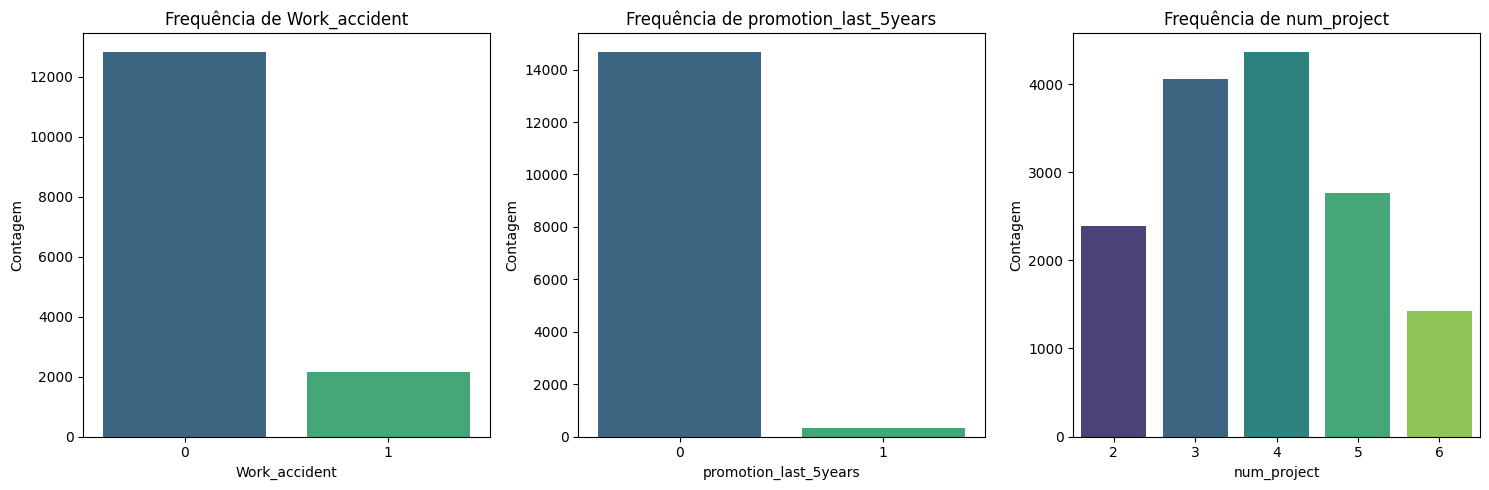

In [605]:
columns = ['Work_accident', 'promotion_last_5years', 'num_project']

# Gerar gráficos de barras para as variáveis binárias
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f'Frequência de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
plt.tight_layout()
plt.show()


In [606]:
df.corr()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
satisfaction_level,1.000000,0.122512,0.003840,-0.131584,0.054925,0.022363,-0.091717
last_evaluation,0.122512,1.000000,0.339324,0.161373,-0.007183,-0.010234,0.348270
average_montly_hours,0.003840,0.339324,1.000000,0.162958,-0.010353,-0.003955,0.408254
time_spend_company,-0.131584,0.161373,0.162958,1.000000,-0.016151,0.046949,0.248179
Work_accident,0.054925,-0.007183,-0.010353,-0.016151,1.000000,0.037295,0.000242
promotion_last_5years,0.022363,-0.010234,-0.003955,0.046949,0.037295,1.000000,-0.002977
num_project,-0.091717,0.348270,0.408254,0.248179,0.000242,-0.002977,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

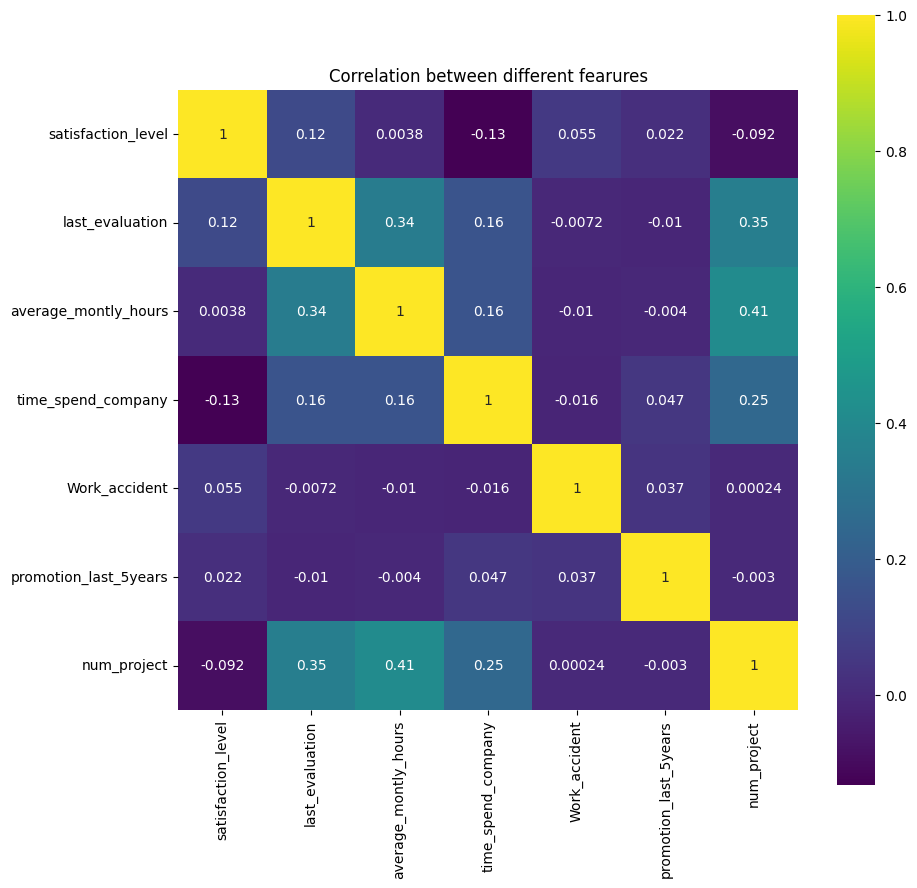

In [607]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

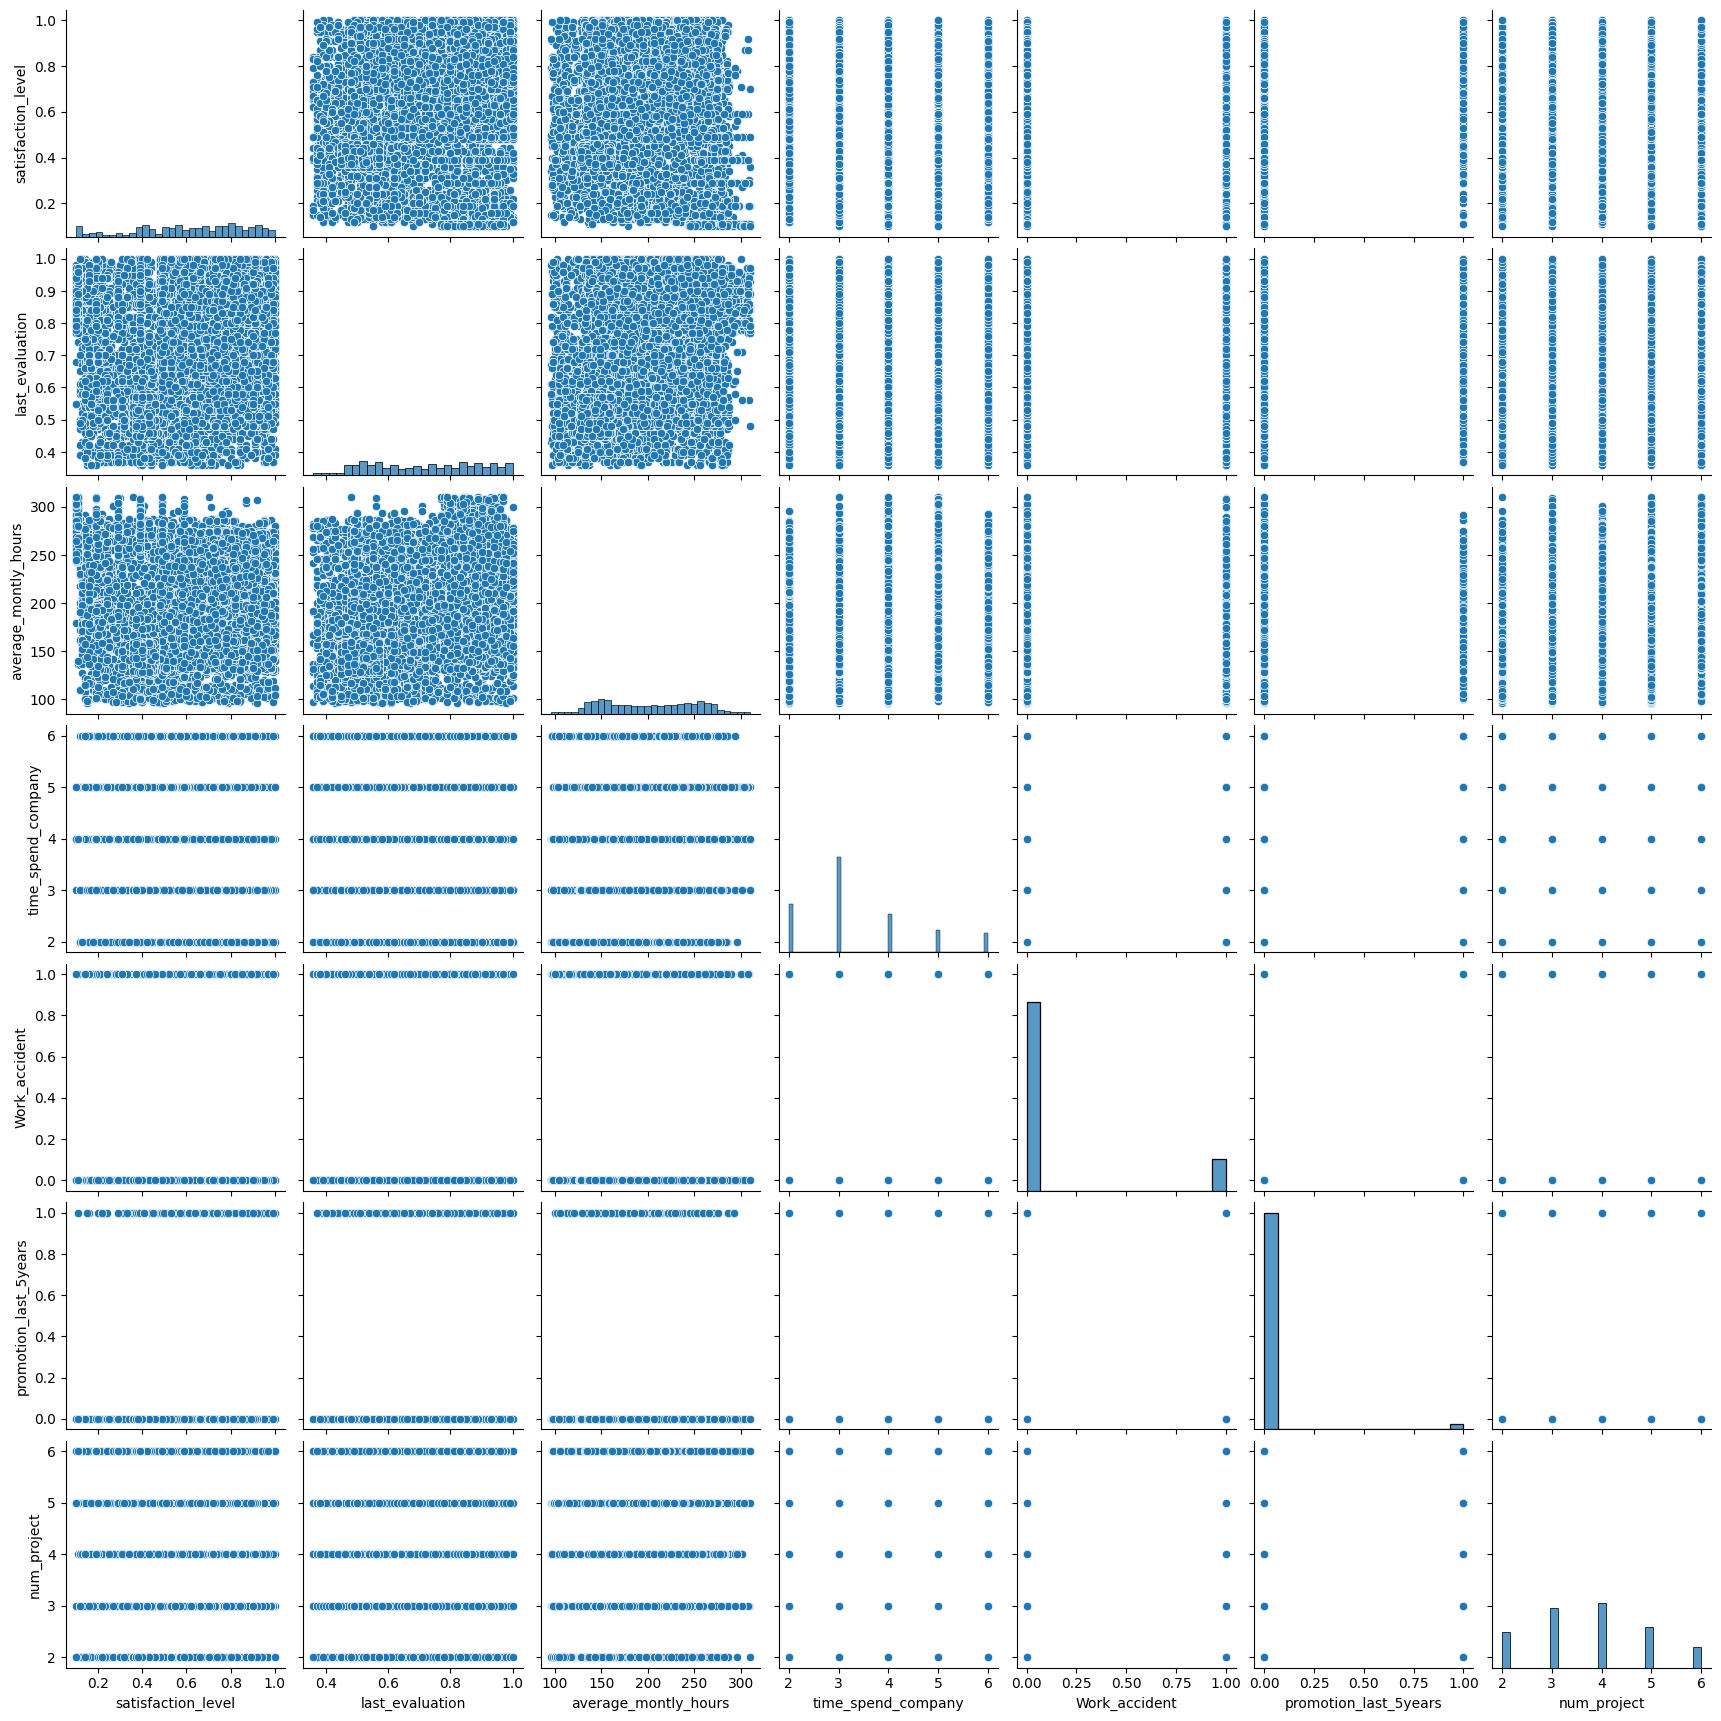

In [608]:
sb.pairplot(df);

## Padronização dos dados

      Tem que se tomar cuidado  com dados que tem diferentes magnitude......devem ser padronizados. 
      
      Isto porque o K-means é muito sensível à escala dos dados porque utiliza cálculo de distâncias para encontrar grupos.
      
      Por isso, sempre é importante aplicar o Scaling antes de usar o K-means. 
      
      o K-Means pode ser bem lento com grande número de observações. 
      Por isso, em alguns casos, utiliza-se uma amostra dos dados e não o conjunto inteiro por questões de performance. 
      
      Clusterização pode ter resultado ruim se os dados tiverrem ruídos (overlapping) ou outliers.
      
      Um grande número de clusters (K) pode diminuir os erros, mas também pode ter maior risco de overfitting.

      Como vantagem, a clusterização não precisa de dados previamente classificados.

In [609]:
# Deixando todas as Feactura na mesma escala

cols = df.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dados_scaled = scaler.fit_transform(df)

dados_scaled = pd.DataFrame(dados_scaled, columns=[cols])

dados_scaled.describe().round(2)

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
count,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00,14996.00
mean,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.13,-2.08,-2.10,-1.20,-0.41,-0.15,-1.50
25%,-0.73,-0.91,-0.90,-0.35,-0.41,-0.15,-0.66
50%,0.10,0.02,-0.02,-0.35,-0.41,-0.15,0.18
75%,0.84,0.90,0.88,0.50,-0.41,-0.15,1.02
max,1.58,1.66,2.18,2.20,2.43,6.70,1.85


In [610]:
print(dados_scaled)

      satisfaction_level last_evaluation average_montly_hours  \
0              -0.975169       -1.086939            -0.881958   
1               0.753991        0.841043             1.221493   
2              -2.086772        0.957890             1.421822   
3               0.424627        0.899466             0.440211   
4              -1.016339       -1.145363            -0.841892   
...                  ...             ...                  ...   
14991          -1.016339       -1.379058            -0.821859   
14992          -1.016339       -1.086939            -1.162418   
14993          -2.086772        1.425280             1.582085   
14994          -1.016339       -1.145363            -0.861925   
14995          -0.975169       -1.086939             1.121329   

      time_spend_company Work_accident promotion_last_5years num_project  
0              -0.345961     -0.411103             -0.149305   -1.495005  
1               2.204694     -0.411103             -0.149305    1.017

#### Como descobrir o número ideal de clusters?
    
    Um bom cluster tem uma baixa inertia_ (SSE) e também o menor número de clusters. 
    Não queremos muitos clusters.
    
    A Curva de Cotovelo ou Método Elbow Curve é uma técnica usada para encontrar a quantidade ideal de clusters K. 
    Este método testa a variância dos dados em relação ao número de clusters.
    O valor ideal de K é aquele que tem um menor Within Sum of Squares (WSS) e ao mesmo tempo o menor número de clusters. 
    
    Chamamos de curva de cotovelo, porque a partir do ponto que seria o “cotovelo” não existe uma discrepância tão significativa em termos de variância. 
    Dessa forma, a melhor quantidade de clusters K seria exatamente onde o cotovelo estaria.
    
    O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k.

    Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters.

    É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho.

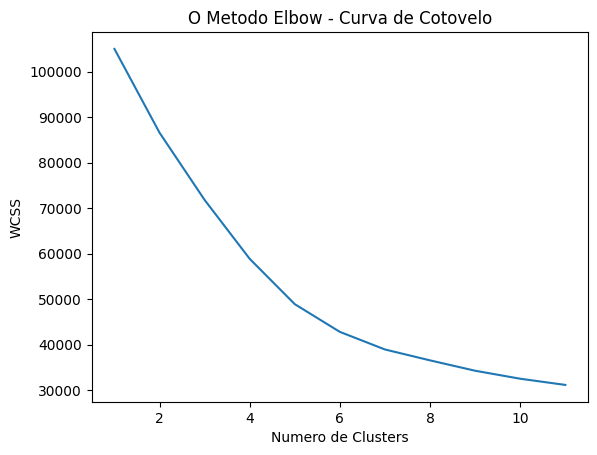

In [611]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
 

wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 15)
    kmeans.fit(dados_scaled)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 12), wcss)
plt.title('O Metodo Elbow - Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# No código acima plotamos o somatório da variância dos dados em relação ao número de clusters
# para conseguir verificar até que ponto com o aumento do número de clusters não existe ganho.

# É sempre bom lembrar que a escolha do parâmetro K é de extrema importância para a tarefa de agrupamento 
# e deve ser corretamente alinhado com as regras do negócio ou problema que esteja resolvendo

In [612]:
dados_scaled.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project
0,-0.975169,-1.086939,-0.881958,-0.345961,-0.411103,-0.149305,-1.495005
1,0.753991,0.841043,1.221493,2.204694,-0.411103,-0.149305,1.017220
2,-2.086772,0.957890,1.421822,0.504257,-0.411103,-0.149305,1.854628
3,0.424627,0.899466,0.440211,1.354476,-0.411103,-0.149305,1.017220
4,-1.016339,-1.145363,-0.841892,-0.345961,-0.411103,-0.149305,-1.495005


In [613]:
# k-means with some arbitrary k
# utilizar o método de inicialização random. Selecionar os centroides de forma aleatória.

Modelo_Kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 15  )

# declarado um objeto Modelo_K-means, agora iremos executar o método fit() para executar o algoritmo e agrupar os dados.
# O método fit() recebe como parâmetro os dados a serem agrupados, nesse caso será a base definida anteriormente.

Segmentos = Modelo_Kmeans.fit(dados_scaled)
Segmentos

KMeans(n_clusters=5, n_init=10, random_state=15)

In [614]:
Segmentos.cluster_centers_

array([[-0.59214094,  0.68532349,  0.80998306,  1.15629089, -0.37630798,
        -0.14930475,  0.9690606 ],
       [ 0.56253512,  0.16465976,  0.08388677, -0.50669219, -0.41110254,
        -0.14930475, -0.00751221],
       [ 0.14977995, -0.06854474, -0.02648698,  0.31445322,  0.24979199,
         6.6977106 , -0.01993717],
       [-0.64584488, -1.02923497, -0.98546428, -0.1774047 , -0.40926025,
        -0.14930475, -0.99044412],
       [ 0.17429092, -0.03508492, -0.05972099, -0.07886811,  2.43248313,
        -0.14930475, -0.02770226]])

Plotando Centroide

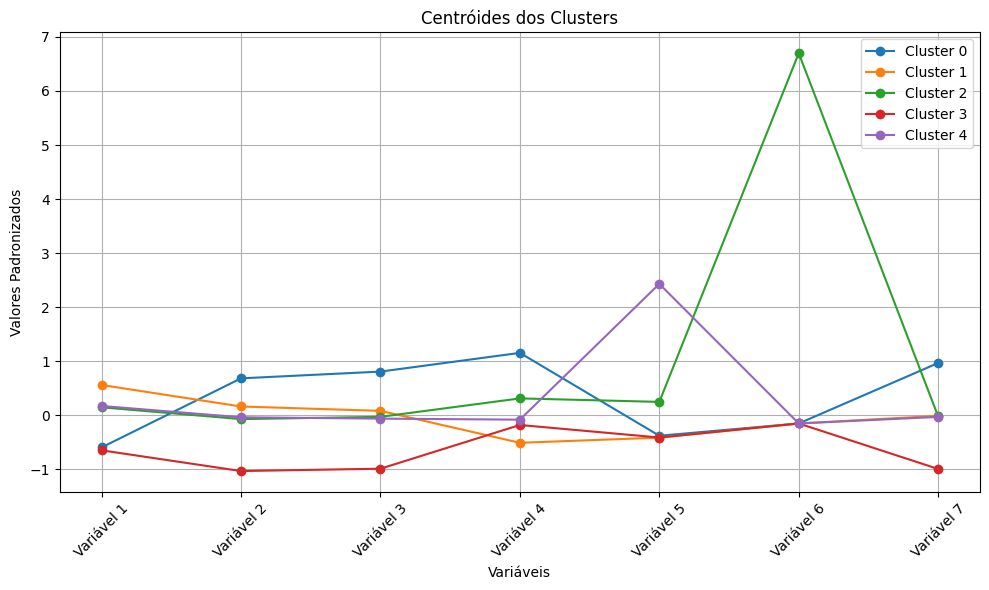

In [615]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nomes das variáveis (ajuste conforme seu dataset)
features = ['Variável 1', 'Variável 2', 'Variável 3', 
            'Variável 4', 'Variável 5', 'Variável 6', 'Variável 7']

# Transformar os centróides em DataFrame
centroids_df = pd.DataFrame(Segmentos.cluster_centers_, columns=features)

# Plotar cada centróide como uma linha
plt.figure(figsize=(10, 6))
for i in range(len(centroids_df)):
    plt.plot(features, centroids_df.iloc[i], marker='o', label=f'Cluster {i}')

plt.title('Centróides dos Clusters')
plt.xlabel('Variáveis')
plt.ylabel('Valores Padronizados')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [616]:
#A tabela de distâncias é criada de forma que em cada instância contém os valores de distância em relação a cada cluster.
distance = Modelo_Kmeans.fit_transform(dados_scaled)
distance

# Observe que cada instância contém cinco valores, e cada valor

# corresponde exatamente a distância entre a observaçãoe cada um dos quatro clusters.

# Verifique a coluna que apresenta a menor distância, significa o cluster que ele está mais próximo

array([[3.80524396, 2.6650251 , 7.27769474, 0.63678403, 3.66251613],
       [1.76304872, 3.19217643, 7.39709282, 4.47585245, 4.13976582],
       [1.97310629, 3.73198292, 7.68256151, 4.51431785, 4.50139478],
       ...,
       [2.14200499, 3.91690844, 7.79035295, 4.82206632, 4.68078812],
       [3.82834501, 2.70961866, 7.290247  , 0.67008213, 3.68837967],
       [3.1436508 , 2.8708838 , 7.29043005, 2.29556315, 3.79493434]])

In [617]:
# visualizando o atributo labels_ que nos retorna os labels para cada observação, ou seja,
# o código do cluster que para observação foi atribuído.
labels = Modelo_Kmeans.labels_
labels

# Só lembrando que a numeração dos clusters inicializa a partir do zero, com isso,
# podemos perceber que a primeira coluna da tabela corresponde aos valores de distâncias para o cluster 0, e assim por diante


array([3, 0, 0, ..., 0, 3, 3], dtype=int32)

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14996 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14996 non-null  float64
 1   last_evaluation        14996 non-null  float64
 2   average_montly_hours   14996 non-null  int64  
 3   time_spend_company     14996 non-null  int64  
 4   Work_accident          14996 non-null  int64  
 5   promotion_last_5years  14996 non-null  int64  
 6   num_project            14996 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 937.2 KB


In [619]:
clusters = Modelo_Kmeans.fit_predict(dados_scaled)

In [620]:
# quantidade de observações por clusters


from collections import Counter

Counter(clusters.tolist())


Counter({1: 6257, 0: 3267, 3: 3095, 4: 2050, 2: 327})

In [621]:
# assign the label

dados_scaled['Cluster_Id'] = labels
dados_scaled.head(54)

# A numeração dos clusters inicializa a partir do zero, com isso, podemos perceber que a primeira coluna da tabela 
# corresponde aos valores de distâncias para o cluster 0,assim por diante

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project,Cluster_Id
0,-0.975169,-1.086939,-0.881958,-0.345961,-0.411103,-0.149305,-1.495005,3
1,0.753991,0.841043,1.221493,2.204694,-0.411103,-0.149305,1.017220,0
2,-2.086772,0.957890,1.421822,0.504257,-0.411103,-0.149305,1.854628,0
3,0.424627,0.899466,0.440211,1.354476,-0.411103,-0.149305,1.017220,0
4,-1.016339,-1.145363,-0.841892,-0.345961,-0.411103,-0.149305,-1.495005,3
5,-0.851657,-1.262211,-0.962089,-0.345961,-0.411103,-0.149305,-1.495005,3
6,-2.127942,0.315229,0.921000,0.504257,-0.411103,-0.149305,1.854628,0
7,1.248037,0.782619,1.161395,1.354476,-0.411103,-0.149305,1.017220,0
8,1.124526,1.658974,0.460244,1.354476,-0.411103,-0.149305,1.017220,0
9,-0.810487,-1.086939,-1.182451,-0.345961,-0.411103,-0.149305,-1.495005,3


In [622]:
dados_scaled[['Cluster_Id']].value_counts()/len(dados_scaled)*100

(Cluster_Id,)
1                41.724460
0                21.785810
3                20.638837
4                13.670312
2                 2.180581
Name: count, dtype: float64

In [623]:
# assign the label

df['Cluster_Id'] = labels
df.head(10)

# A numeração dos clusters inicializa a partir do zero, com isso, podemos perceber que a primeira coluna da tabela 
# corresponde aos valores de distâncias para o cluster 0,assim por diante

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,num_project,Cluster_Id
0,0.38,0.53,157,3,0,0,2,3
1,0.80,0.86,262,6,0,0,5,0
2,0.11,0.88,272,4,0,0,6,0
3,0.72,0.87,223,5,0,0,5,0
4,0.37,0.52,159,3,0,0,2,3
5,0.41,0.50,153,3,0,0,2,3
6,0.10,0.77,247,4,0,0,6,0
7,0.92,0.85,259,5,0,0,5,0
8,0.89,1.00,224,5,0,0,5,0
9,0.42,0.53,142,3,0,0,2,3


In [624]:
# Box plot to visualize Cluster Id vs Frequency
# Transforma classe em categorica
df['Cluster_Id'] = df['Cluster_Id'].astype('string')

In [625]:
# Box plot to visualize Cluster Id vs Frequency
# Transforma classe em categorica
df['Cluster_Id'] = df['Cluster_Id'].astype('string')

In [626]:
df.groupby(df['Cluster_Id'])['last_evaluation'].mean().reset_index()

,Cluster_Id,last_evaluation
0,0,0.833318
1,1,0.744480
2,2,0.704312
3,3,0.539984
4,4,0.710039


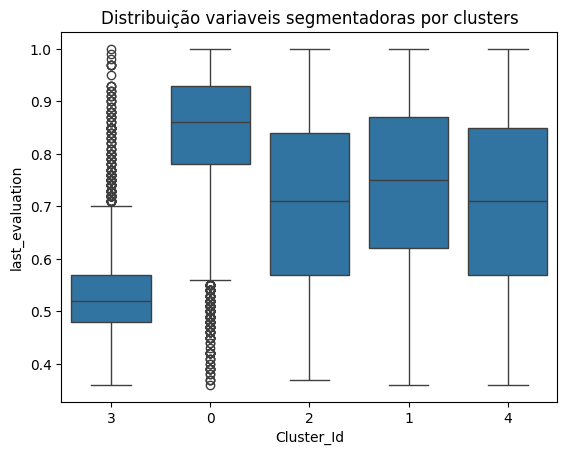

In [627]:
 # Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='last_evaluation', data=df)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14996 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14996 non-null  float64
 1   last_evaluation        14996 non-null  float64
 2   average_montly_hours   14996 non-null  int64  
 3   time_spend_company     14996 non-null  int64  
 4   Work_accident          14996 non-null  int64  
 5   promotion_last_5years  14996 non-null  int64  
 6   num_project            14996 non-null  int64  
 7   Cluster_Id             14996 non-null  string 
dtypes: float64(2), int64(5), string(1)
memory usage: 1.0 MB


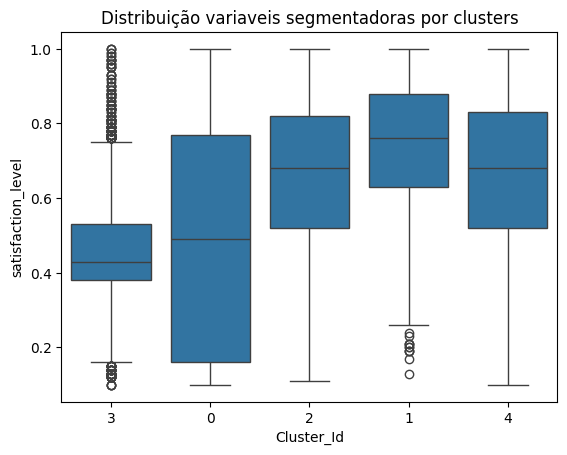

In [629]:
 
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='satisfaction_level', data=df)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

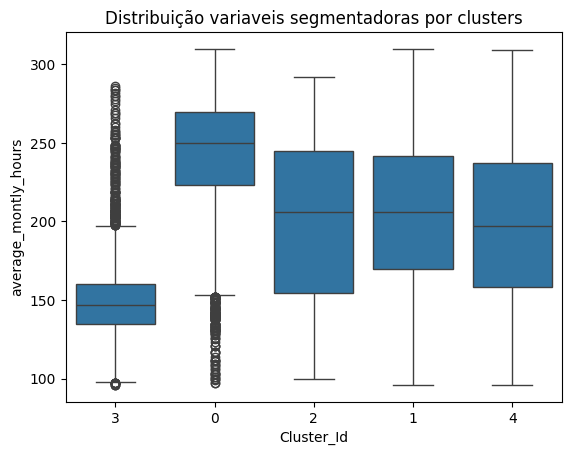

In [630]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='average_montly_hours', data=df)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14996 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14996 non-null  float64
 1   last_evaluation        14996 non-null  float64
 2   average_montly_hours   14996 non-null  int64  
 3   time_spend_company     14996 non-null  int64  
 4   Work_accident          14996 non-null  int64  
 5   promotion_last_5years  14996 non-null  int64  
 6   num_project            14996 non-null  int64  
 7   Cluster_Id             14996 non-null  string 
dtypes: float64(2), int64(5), string(1)
memory usage: 1.0 MB


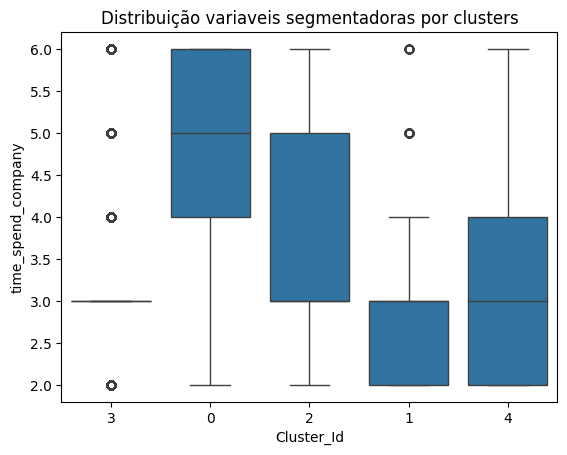

In [632]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='time_spend_company', data=df)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

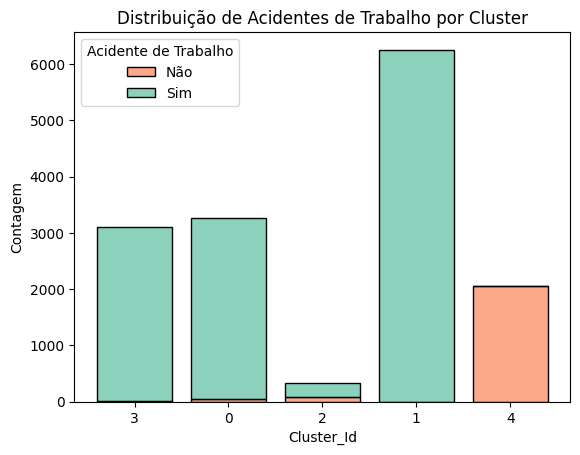

In [633]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.histplot(data=df, x='Cluster_Id', hue='Work_accident', multiple='stack', shrink=0.8, palette='Set2')
plt.title('Distribuição de Acidentes de Trabalho por Cluster')
plt.xlabel('Cluster_Id')
plt.ylabel('Contagem')
plt.legend(title='Acidente de Trabalho', labels=['Não', 'Sim'])
plt.show()



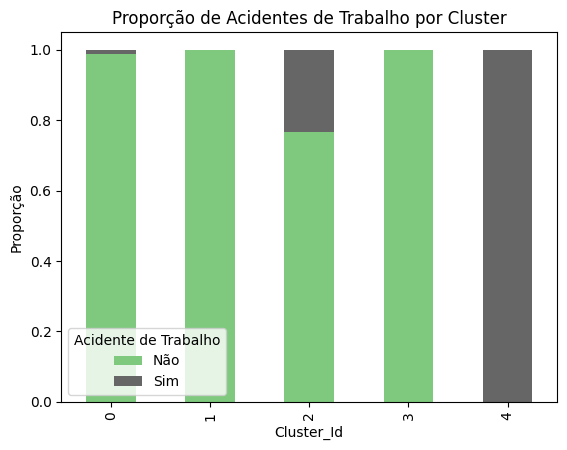

In [634]:
cluster_accident = df.groupby(['Cluster_Id', 'Work_accident']).size().unstack(fill_value=0)
cluster_accident = cluster_accident.div(cluster_accident.sum(axis=1), axis=0)

cluster_accident.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Proporção de Acidentes de Trabalho por Cluster')
plt.xlabel('Cluster_Id')
plt.ylabel('Proporção')
plt.legend(title='Acidente de Trabalho', labels=['Não', 'Sim'])
plt.show()


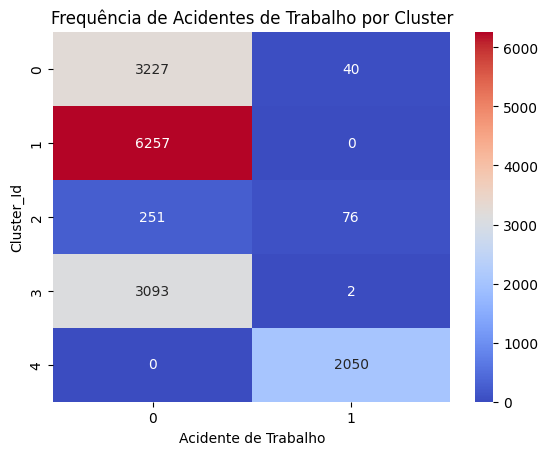

In [635]:
heatmap_data = df.groupby(['Cluster_Id', 'Work_accident']).size().unstack(fill_value=0)
sb.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequência de Acidentes de Trabalho por Cluster')
plt.xlabel('Acidente de Trabalho')
plt.ylabel('Cluster_Id')
plt.show()


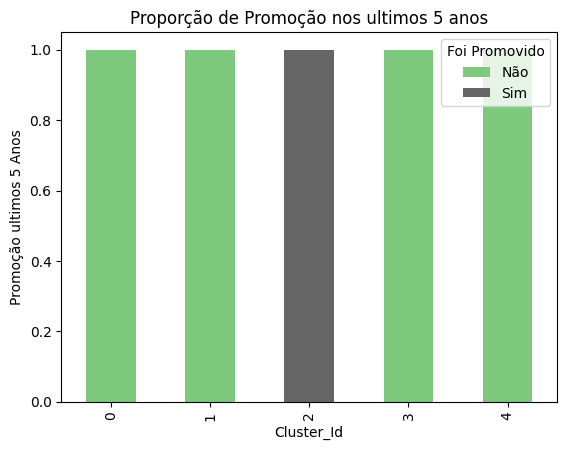

In [636]:
cluster_accident = df.groupby(['Cluster_Id', 'promotion_last_5years']).size().unstack(fill_value=0)
cluster_accident = cluster_accident.div(cluster_accident.sum(axis=1), axis=0)

cluster_accident.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Proporção de Promoção nos ultimos 5 anos')
plt.xlabel('Cluster_Id')
plt.ylabel('Promoção ultimos 5 Anos')
plt.legend(title='Foi Promovido', labels=['Não', 'Sim'])
plt.show()


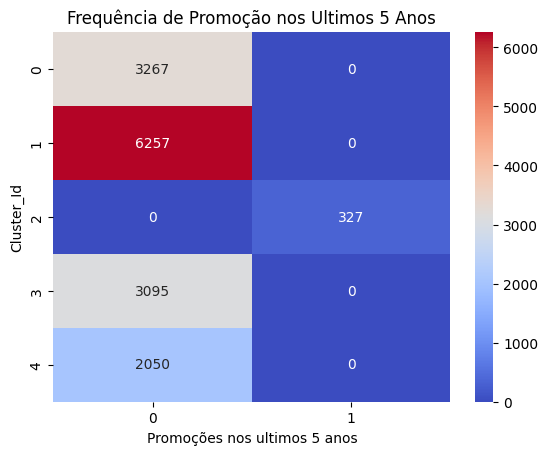

In [637]:
heatmap_data = df.groupby(['Cluster_Id', 'promotion_last_5years']).size().unstack(fill_value=0)
sb.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequência de Promoção nos Ultimos 5 Anos')
plt.xlabel('Promoções nos ultimos 5 anos')
plt.ylabel('Cluster_Id')
plt.show()


In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14996 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14996 non-null  float64
 1   last_evaluation        14996 non-null  float64
 2   average_montly_hours   14996 non-null  int64  
 3   time_spend_company     14996 non-null  int64  
 4   Work_accident          14996 non-null  int64  
 5   promotion_last_5years  14996 non-null  int64  
 6   num_project            14996 non-null  int64  
 7   Cluster_Id             14996 non-null  string 
dtypes: float64(2), int64(5), string(1)
memory usage: 1.0 MB


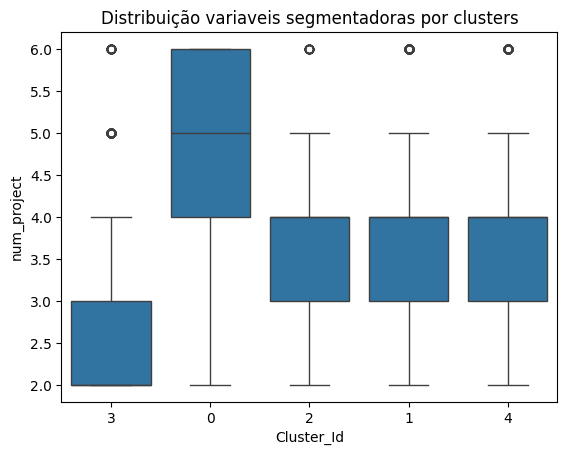

In [639]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='num_project', data=df)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

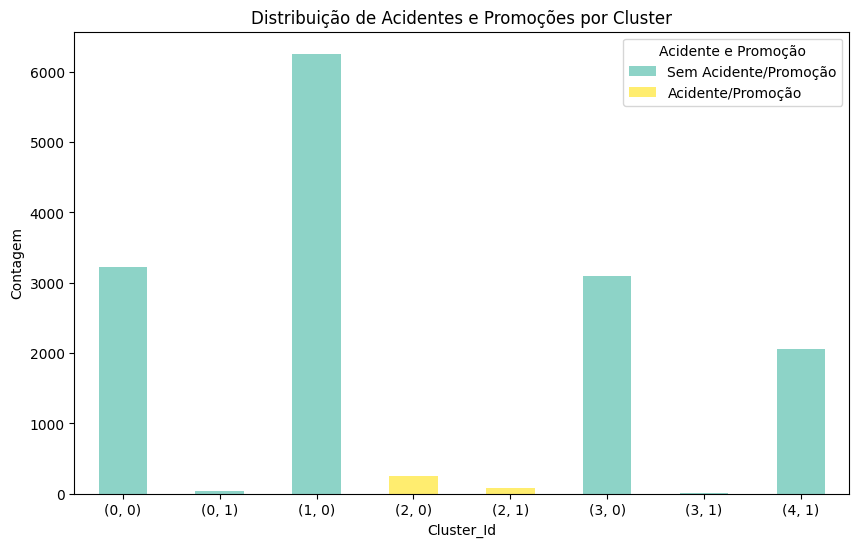

In [640]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamento por Cluster, Acidente e Promoção
grouped = df.groupby(['Cluster_Id', 'Work_accident', 'promotion_last_5years']).size().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Distribuição de Acidentes e Promoções por Cluster')
plt.xlabel('Cluster_Id')
plt.ylabel('Contagem')
plt.legend(title='Acidente e Promoção', labels=['Sem Acidente/Promoção', 'Acidente/Promoção'])
plt.xticks(rotation=0)
plt.show()

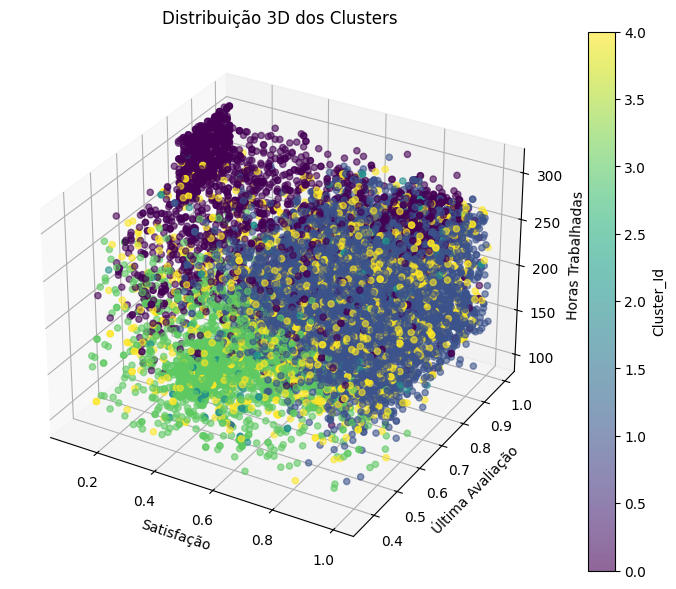

In [641]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sb

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['satisfaction_level'],
    df['last_evaluation'],
    df['average_montly_hours'],
    c=df['Cluster_Id'].astype(int),  # Converte Cluster_Id para int para colorir
    cmap='viridis',
    alpha=0.6
)

ax.set_xlabel('Satisfação')
ax.set_ylabel('Última Avaliação')
ax.set_zlabel('Horas Trabalhadas')
plt.title('Distribuição 3D dos Clusters')
fig.colorbar(scatter, label='Cluster_Id')
plt.show()


In [642]:
# Verificando se as duas colunas têm o mesmo tamanho e a mesma ordem
print(len(df), len(df_backup))

14996 15000


In [643]:
# Atribuir a coluna 'left' de df_backup a df
df['left'] = df_backup['left']

In [644]:
print(df[['Cluster_Id', 'left']].head())

  Cluster_Id  left
0          3     1
1          0     1
2          0     1
3          0     1
4          3     1


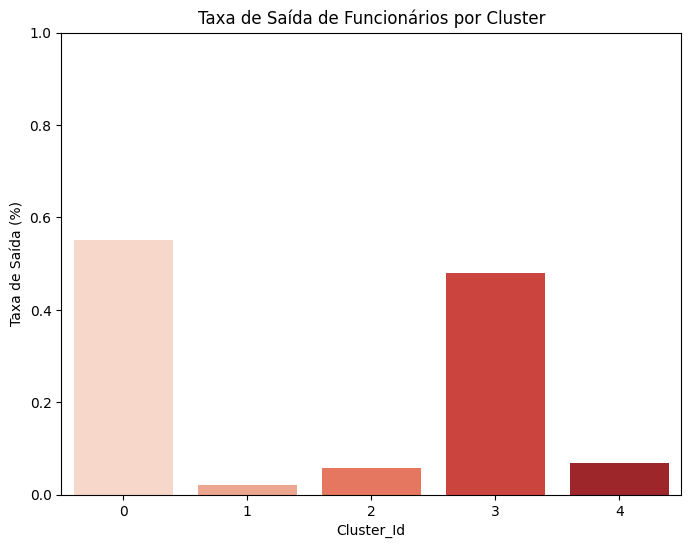

In [645]:
taxa_saida = df.groupby('Cluster_Id', as_index=False)['left'].mean()
plt.figure(figsize=(8, 6))
sb.barplot(x='Cluster_Id', y='left', data=taxa_saida, palette='Reds')
plt.title('Taxa de Saída de Funcionários por Cluster')
plt.xlabel('Cluster_Id')
plt.ylabel('Taxa de Saída (%)')
plt.ylim(0, 1)
plt.show()


In [648]:
# Verificar os nomes das colunas do seu DataFrame
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'num_project', 'Cluster_Id', 'left'],
      dtype='object')


In [649]:
# Adicionar a coluna 'Cluster_ID' com os labels gerados pelo modelo KMeans
df['Cluster_ID'] = Modelo_Kmeans.labels_

# Verifique se a coluna foi criada corretamente
print(df.head())  # Verifique as primeiras linhas do DataFrame


   satisfaction_level  last_evaluation  average_montly_hours  \
0                0.38             0.53                   157   
1                0.80             0.86                   262   
2                0.11             0.88                   272   
3                0.72             0.87                   223   
4                0.37             0.52                   159   

   time_spend_company  Work_accident  promotion_last_5years  num_project  \
0                   3              0                      0            2   
1                   6              0                      0            5   
2                   4              0                      0            6   
3                   5              0                      0            5   
4                   3              0                      0            2   

  Cluster_Id  left  Cluster_ID  
0          3     1           3  
1          0     1           0  
2          0     1           0  
3          0     1        

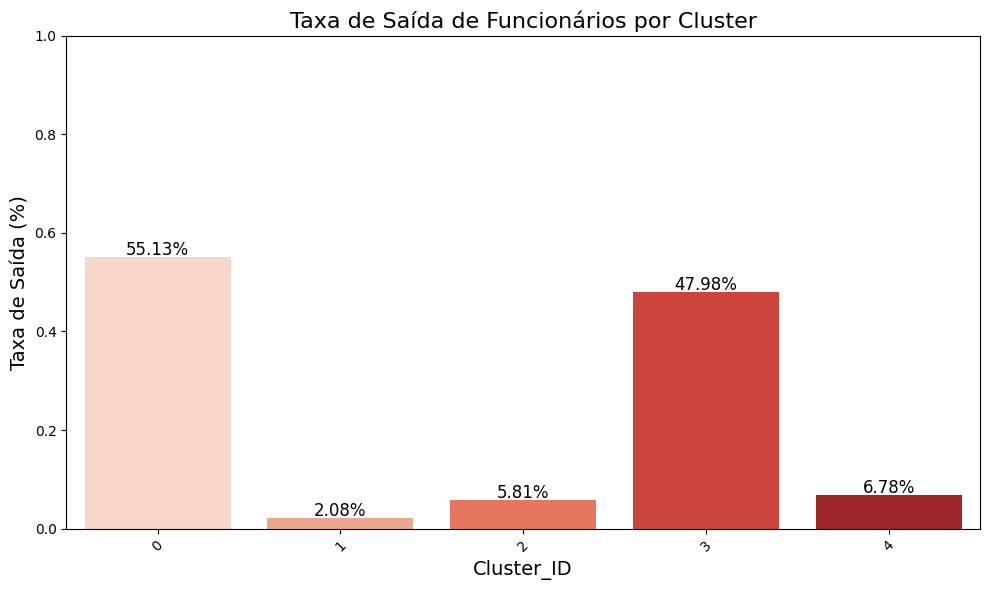

In [650]:
# Calcular a taxa de saída por cluster
taxa_saida = df.groupby('Cluster_ID', as_index=False)['left'].mean()

# Plotando a taxa de saída por cluster
plt.figure(figsize=(10, 6))
sb.barplot(x='Cluster_ID', y='left', data=taxa_saida, palette='Reds')

# Melhorando o gráfico
plt.title('Taxa de Saída de Funcionários por Cluster', fontsize=16)
plt.xlabel('Cluster_ID', fontsize=14)
plt.ylabel('Taxa de Saída (%)', fontsize=14)

# Ajustando o eixo Y para mostrar como porcentagem
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Adicionando valores no topo das barras para facilitar a leitura
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
